### Lab 15: ResNet from Scratch for CIFAR-10 Classification


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.3607 - loss: 1.7753 - val_accuracy: 0.4871 - val_loss: 1.5563
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.6215 - loss: 1.0965 - val_accuracy: 0.6652 - val_loss: 0.9633
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7043 - loss: 0.8785 - val_accuracy: 0.6763 - val_loss: 0.9967
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7585 - loss: 0.7192 - val_accuracy: 0.6935 - val_loss: 0.8940
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7964 - loss: 0.6095 - val_accuracy: 0.7526 - val_loss: 0.7178
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8242 - loss: 0.5334 - val_accuracy: 0.7666 - val_loss: 0.6790
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8505 - loss: 0.4635 - val_accuracy: 0.7049 - val_loss: 0.9496
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━

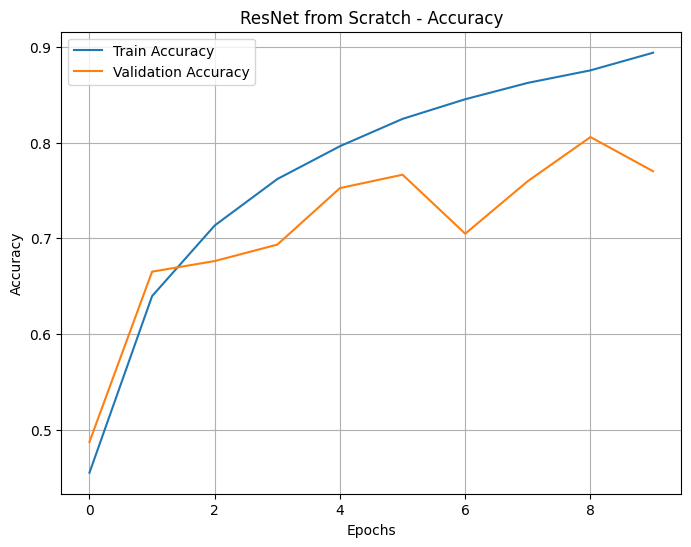

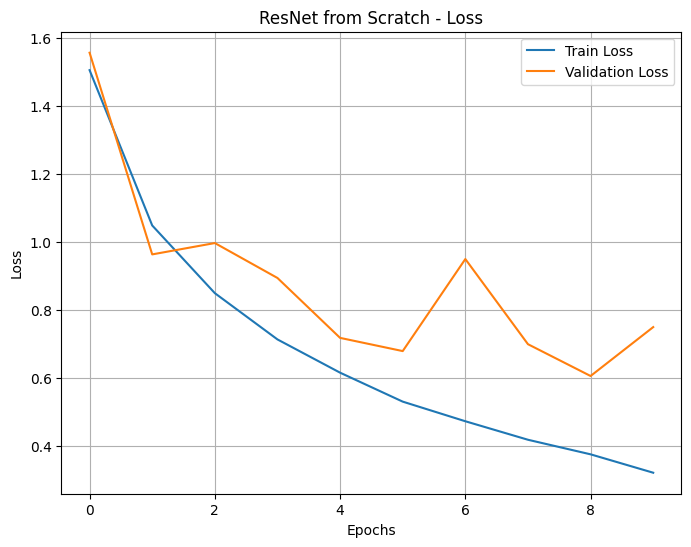

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


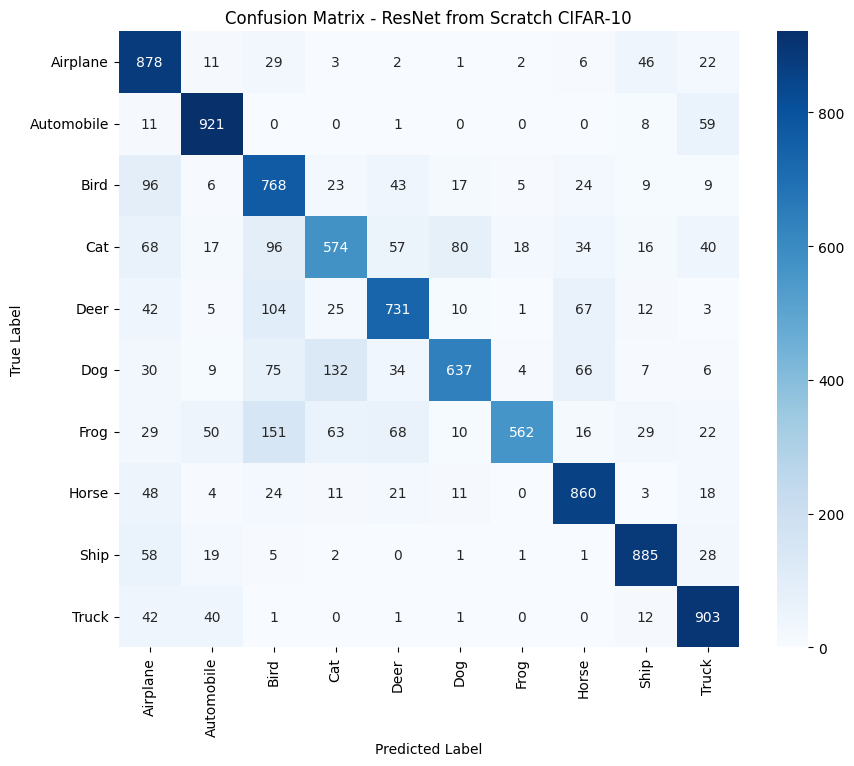


Classification Report - ResNet from Scratch CIFAR-10
              precision    recall  f1-score   support

    Airplane       0.67      0.88      0.76      1000
  Automobile       0.85      0.92      0.88      1000
        Bird       0.61      0.77      0.68      1000
         Cat       0.69      0.57      0.63      1000
        Deer       0.76      0.73      0.75      1000
         Dog       0.83      0.64      0.72      1000
        Frog       0.95      0.56      0.71      1000
       Horse       0.80      0.86      0.83      1000
        Ship       0.86      0.89      0.87      1000
       Truck       0.81      0.90      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 2. Define Residual Block
def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = (2, 2) if downsample else (1, 1)

    # First Conv Layer
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Second Conv Layer
    x = layers.Conv2D(filters, (3, 3), padding="same")(x)
    x = layers.BatchNormalization()(x)

    # Adjust shortcut if dimensions change
    if downsample:
        shortcut = layers.Conv2D(filters, (1, 1), strides=(2, 2), padding="same")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add shortcut to main path
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# 3. Build Small ResNet Model
def build_resnet():
    inputs = layers.Input(shape=(32, 32, 3))

    x = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    # Residual Blocks
    x = residual_block(x, 32)
    x = residual_block(x, 32)
    x = residual_block(x, 64, downsample=True)
    x = residual_block(x, 64)
    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 4. Train Model
model = build_resnet()
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

# 5. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 6. Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ResNet from Scratch - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 7. Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ResNet from Scratch - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 8. Predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - ResNet from Scratch CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 10. Classification Report
print("\nClassification Report - ResNet from Scratch CIFAR-10")
print(classification_report(y_true, y_pred, target_names=class_names))
